In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
GoldData = pd.read_csv("gld_price_data.csv")

In [3]:
#to print the first 5 rows
GoldData.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#to print the last 5 rows
GoldData.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#to know the number of rows & columns
GoldData.shape
#here we have 2290 row and 6 columns

(2290, 6)

In [6]:
#to know some basic information about the data
GoldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#to know the number of missing in each column
GoldData.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#to know the statistical measures of the data
GoldData.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = GoldData.corr()

C:\Users\omara\AppData\Local\Temp\ipykernel_7260\4134007178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = GoldData.corr()


<Axes: >

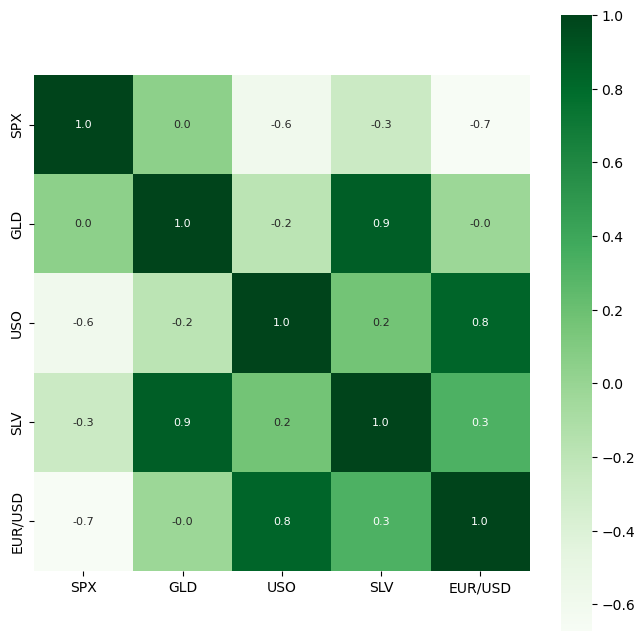

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Greens')

In [11]:
#to get the correlation value with GLD +ve means direct &-ve means inverse 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


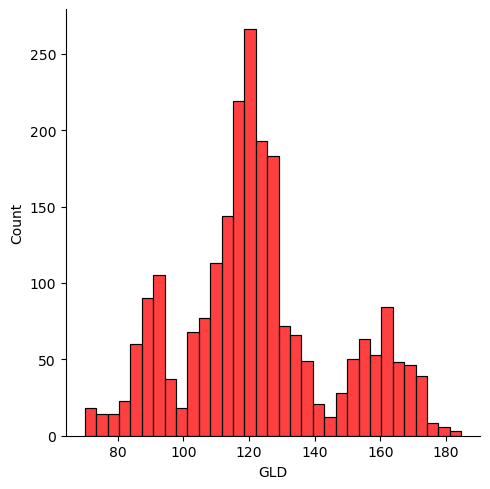

In [12]:
sns.displot(GoldData['GLD'] , color='red')

In [13]:
x=GoldData.drop(['Date','GLD'] , axis=1)
y=GoldData['GLD']

In [14]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=2)

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
regressor.fit(x_train , y_train)

RandomForestRegressor()

In [21]:
test_data_prediction = regressor.predict(x_test)

In [22]:
print(test_data_prediction)

[168.64259974  82.0667998  116.1340005  127.64030101 120.71780123
 154.56649808 150.15429791 125.97010013 117.46849899 125.90350089
 116.5071013  171.64260073 141.67059821 167.81749801 115.13050008
 117.57670034 137.99200317 169.97080144 159.17910317 157.6582996
 155.15489996 125.17720027 175.92829986 157.58740342 125.15980063
  93.78899976  77.23969999 120.10359974 119.11009906 167.49909957
  88.28350019 125.21409974  91.14510081 117.65450039 121.10759919
 136.37500097 115.36540103 115.43830029 147.77459919 107.29420107
 104.09860226  87.10399767 126.53680025 118.1950997  153.20689871
 119.73149996 108.27859989 108.0634987   93.13530027 126.98459809
  74.67000067 113.60889903 121.65860013 111.0843989  118.82349892
 120.52679943 159.52170006 167.9244014  147.07159664  85.75409852
  94.42270008  86.66579865  90.40630029 118.69410101 126.39980012
 127.6351001  168.92589905 122.2788995  117.49059892  98.37110082
 168.24640099 143.12529913 131.75790219 121.18910195 120.98749932
 119.779100

In [25]:
error_score=metrics.r2_score(y_test , test_data_prediction)
print("R Squared Error :" , error_score*100)

R Squared Error : 98.93449891957297


In [26]:
y_test = list(y_test)

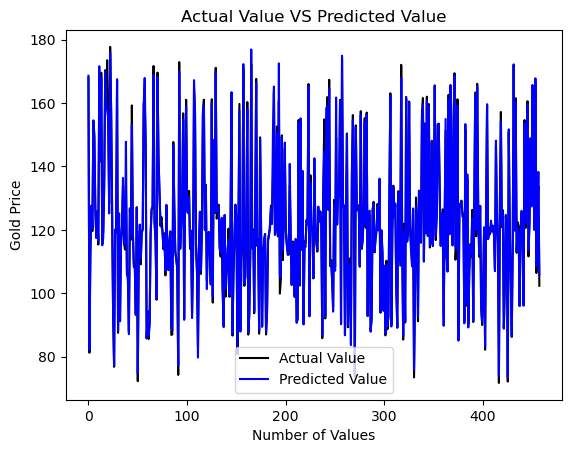

In [32]:
plt.plot(y_test , color='black' , label='Actual Value')
plt.plot(test_data_prediction , color='blue' , label='Predicted Value')
plt.title('Actual Value VS Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [33]:
'''Created by:
    Engineer Omar Ashor
Contact information:
    WhatsApp: +201202984561
    LinkedIn: https://www.linkedin.com/in/omar-ashor-6927a0214'''

'Created by:\n    Engineer Omar Ashor\nContact information:\n    WhatsApp: +201202984561\n    LinkedIn: https://www.linkedin.com/in/omar-ashor-6927a0214'